<h1 align='center'> K-NEAREST NEIGHBORS </h1>


O algoritmo KNN é um método de aprendizado que tem como base a proximidade de pontos em meio ao espaço de características que 
possibilita a classificação de uma amostra com base nos k vizinhos mais próximos. O dado de teste será rotulado de acordo com a classe que possuir mais pontos próximos à amostra. O parâmetro k pode ser variado e adaptado para cada conjunto de dados e interfere diretamente no desempenho do algoritmo.

O objetivo é calcular a distância do ponto a ser rotulado para os outros pontos, verificar a classe dos k pontos mais próximos e a partir dessa informação, determinar o rótulo do ponto.

## Funcionamento do algoritmo
1 - Escolha o valor de K
2 - Calcule a distância entre o ponto a ser classificado e todos os outros pontos no conjunto de dados. 
3 - Identifique os k vizinhos mais próximos
4 - Atribua a classe mais frequente entre os vizinhos mais próximos ao ponto

### Parâmetros
K - quantidade de vizinhos mais próximos para avaliar as classes

## Passos para o treinamento

Dados de Exemplo
Para visualizar a aplicação desse algoritmo serão geradas um conjunto de dados por meio de distribuições gaussianas. Os valores de desvio padrão e k serão variados para avaliação do algoritmo, que deve classificar corretamente cada amostra de teste.

Métrica utilizada: distância Euclidiana

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Função para classificação
def knn(dados, classes, k, amostra):
    N = dados.shape[0] #quantidades de pontos no espaço amostral
    distancias = np.zeros([N], dtype=[('index', int), ('distancia', float)])
    knn_class = {} #classe dos k vizinhos mais próximos
    
    for i in range(N):
        dist = np.linalg.norm(dados[i]-amostra) 
        distancias[i] = (i, dist) #vetor com as distâncias e os índices
    
    distancias = np.sort(distancias, order=['distancia'], axis=0)

    for i in range(k):
        ki = distancias[i][0] #indice do ponto mais próximo
        ki_classe = classes[ki] #classe do k vizinho
        knn_class[ki_classe] = knn_class.get(ki_classe,0) + 1
        
    classe_amostra = max(knn_class, key=knn_class.get)
        
    return (amostra, classe_amostra)

#Função para geração dos dados de exemplo
def gaussianas(n, mean, sd):
    #cada gaussiana uma classe
    g1 = np.random.normal(mean,sd,size=(n,2)) + np.full((n,2), [2,2])
    classe_g1 = np.full(n, 1)

    g2 = np.random.normal(mean,sd,size=(n,2)) + np.full((n,2), [4,4])
    classe_g2 = np.full(n, 2)

    g3 = np.random.normal(mean,sd,size=(n,2)) + np.full((n,2), [2,4])
    classe_g3 = np.full(n, 3)

    g4 = np.random.normal(mean,sd,size=(n,2)) + np.full((n,2), [4,2])
    classe_g4 = np.full(n, 4)

    dados = np.concatenate((g1, g2, g3, g4), axis=0)
    classes = np.concatenate((classe_g1, classe_g2, classe_g3, classe_g4), axis=0)

    return dados, classes

#Funções para visualização dos dados
def grafico_dados(dados, teste, n, k, sd):
        
    cor = {1:'red', 2:'green', 3:'blue', 4:'y'}

    plt.title("Conjunto de dados \n k = {} |  sd = {}".format(k, sd))
    plt.xlabel("X")
    plt.ylabel("Y")

    plt.plot(dados[:n,0],dados[:n,1], 'o', color=(cor[1]), alpha=0.5)
    plt.plot(dados[n:n*2,0],dados[n:n*2,1], 'o', color=(cor[2]), alpha=0.5)
    plt.plot(dados[n*2:n*3,0],dados[n*2:n*3,1], 'o', color=(cor[3]), alpha=0.5)
    plt.plot(dados[n*3:n*4,0],dados[n*3:n*4,1], 'o', color=(cor[4]), alpha=0.5)
    
    xt = teste[:,0]
    yt = teste[:,1]
    plt.plot(xt, yt, 'o', color='black')
    plt.legend(['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Amostras de teste'], bbox_to_anchor=(1, 1))

    plt.show()

def grafico_resultado(dados, teste, n, k, sd):
        
    cor = {1:'red', 2:'green', 3:'blue', 4:'y'}

    fig, sub = plt.subplots(5, 4, sharex=True, sharey=True)
    fig.suptitle('Classificação das amostras de teste \n k = {} |  sd = {}'.format(k, sd))

    ind_amostra = 0
    
    for i in range(5):
        for j in range(4):

            x = teste[ind_amostra][0][0]
            y = teste[ind_amostra][0][1]
            classe_amostra = cor[teste[ind_amostra][1]]

            sub[i, j].plot(x, y, 'o', color=classe_amostra, alpha=1)
            sub[i, j].text(x+0.1, y+0.1, ind_amostra+1)

            sub[i, j].plot(dados[:n,0],dados[:n,1], 'o', color=(cor[1]), alpha = 0.07)
            sub[i, j].plot(dados[n:n*2,0],dados[n:n*2,1], 'o', color=(cor[2]), alpha = 0.07)
            sub[i, j].plot(dados[n*2:n*3,0],dados[n*2:n*3,1], 'o', color=(cor[3]), alpha = 0.07)
            sub[i, j].plot(dados[n*3:n*4,0],dados[n*3:n*4,1], 'o', color=(cor[4]), alpha = 0.07)

            ind_amostra = ind_amostra + 1
                            
    plt.show()


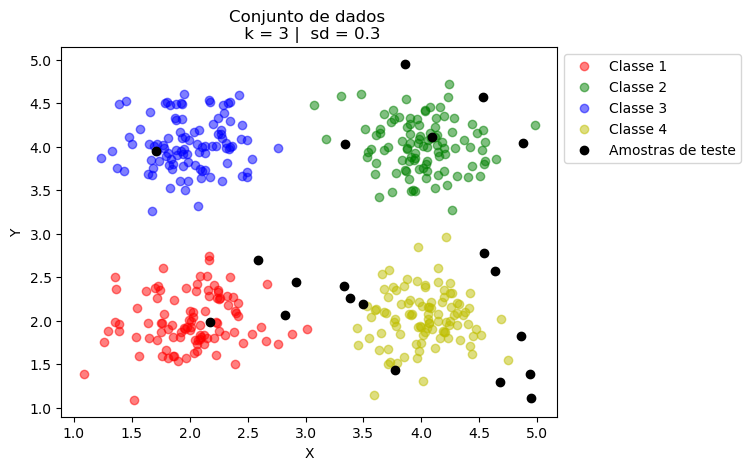

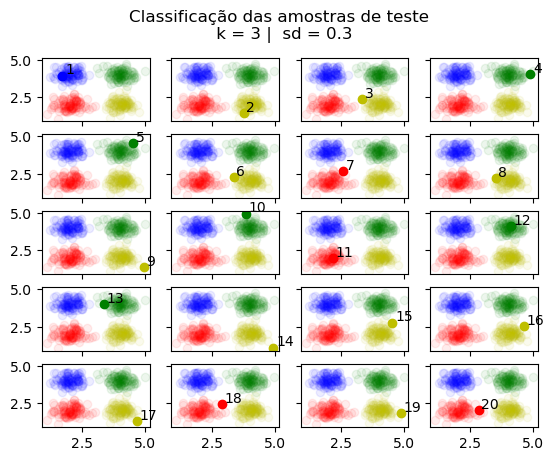

In [2]:
#Teste com k = 3 vizinhos próximos | quantidade de pontos n = 100 | amostras com desvio-padão = 0.3 

k = 3
sd = 0.3
n = 100
resultado = []

dados, classes = gaussianas(n,0,sd)
amostras_teste = np.random.uniform(dados.min(),dados.max(), size=(20,2))

grafico_dados(dados, amostras_teste, n, k, sd)

for ponto_teste in amostras_teste:
    classificacao = knn(dados, classes, k, ponto_teste)
    resultado.append(classificacao)
                       
grafico_resultado(dados, resultado, n, k, sd)   

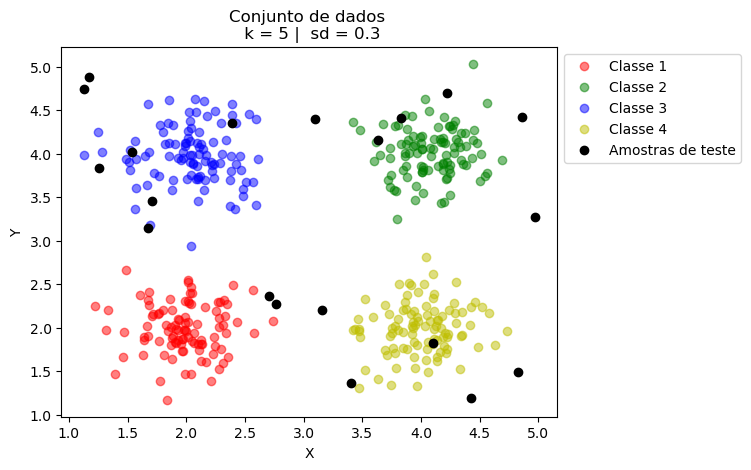

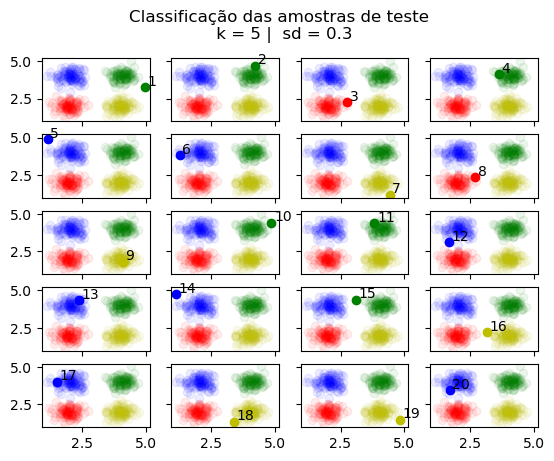

In [3]:
k = 5
sd = 0.3
n = 100
resultado = []

dados, classes = gaussianas(n,0,sd)
amostras_teste = np.random.uniform(dados.min(),dados.max(), size=(20,2))

grafico_dados(dados, amostras_teste, n, k, sd)

for ponto_teste in amostras_teste:
    classificacao = knn(dados, classes, k, ponto_teste)
    resultado.append(classificacao)
                       
grafico_resultado(dados, resultado, n, k, sd)   

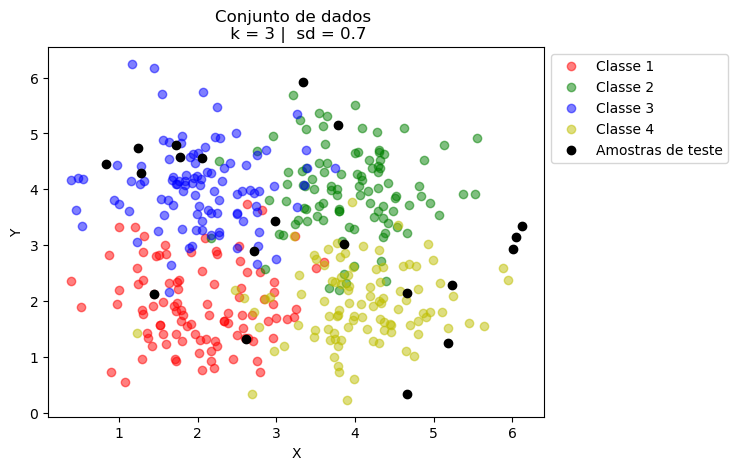

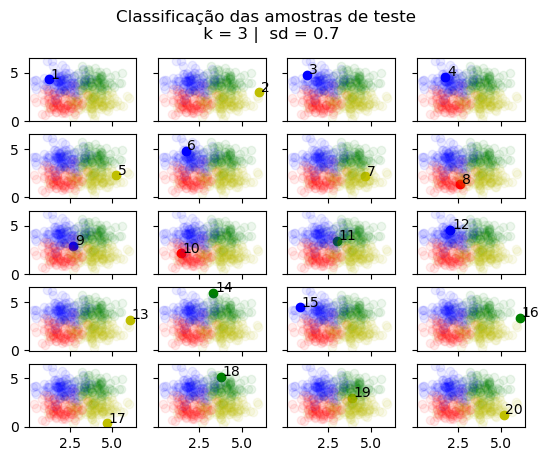

In [4]:
k = 3
sd = 0.7
n = 100
resultado = []

dados, classes = gaussianas(n,0,sd)
amostras_teste = np.random.uniform(dados.min(),dados.max(), size=(20,2))

grafico_dados(dados, amostras_teste, n, k, sd)

for ponto_teste in amostras_teste:
    classificacao = knn(dados, classes, k, ponto_teste)
    resultado.append(classificacao)
                       
grafico_resultado(dados, resultado, n, k, sd)   

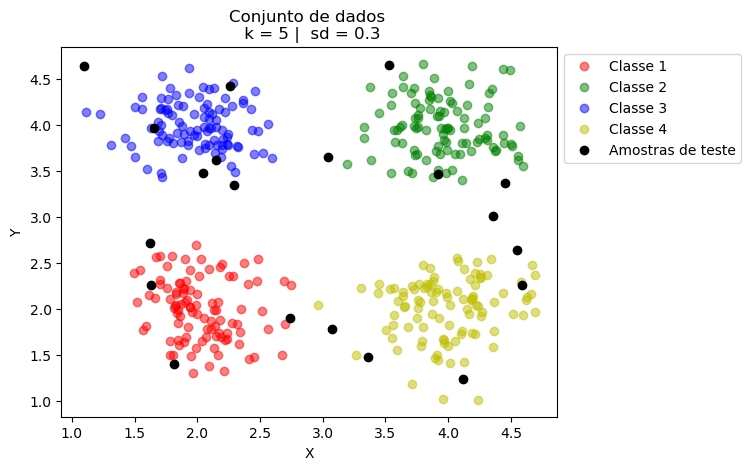

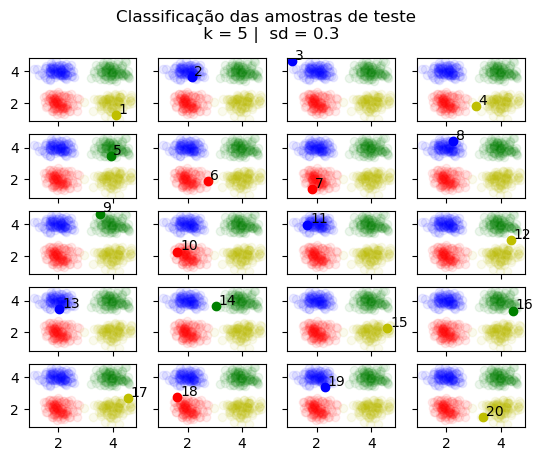

In [5]:
k = 5
sd = 0.3
n = 100
resultado = []

dados, classes = gaussianas(n,0,sd)
amostras_teste = np.random.uniform(dados.min(),dados.max(), size=(20,2))

grafico_dados(dados, amostras_teste, n, k, sd)

for ponto_teste in amostras_teste:
    classificacao = knn(dados, classes, k, ponto_teste)
    resultado.append(classificacao)
                       
grafico_resultado(dados, resultado, n, k, sd)   

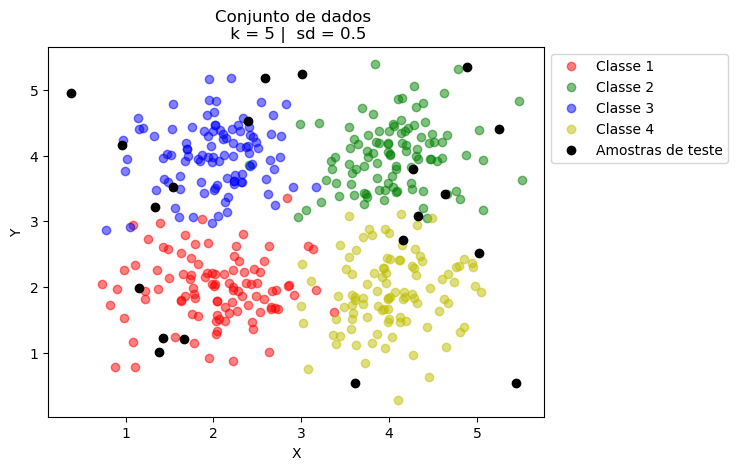

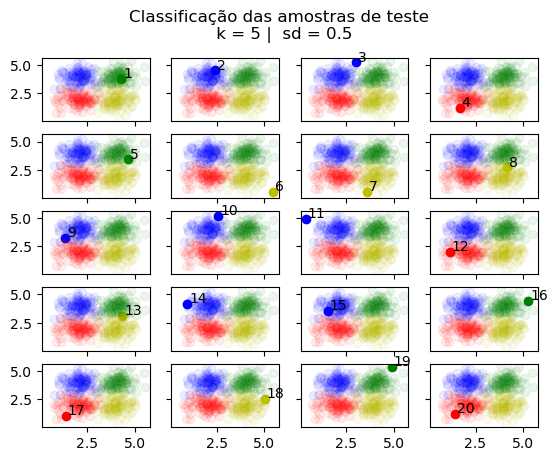

In [6]:
k = 5
sd = 0.5
n = 100
resultado = []

dados, classes = gaussianas(n,0,sd)
amostras_teste = np.random.uniform(dados.min(),dados.max(), size=(20,2))

grafico_dados(dados, amostras_teste, n, k, sd)

for ponto_teste in amostras_teste:
    classificacao = knn(dados, classes, k, ponto_teste)
    resultado.append(classificacao)
                       
grafico_resultado(dados, resultado, n, k, sd)   

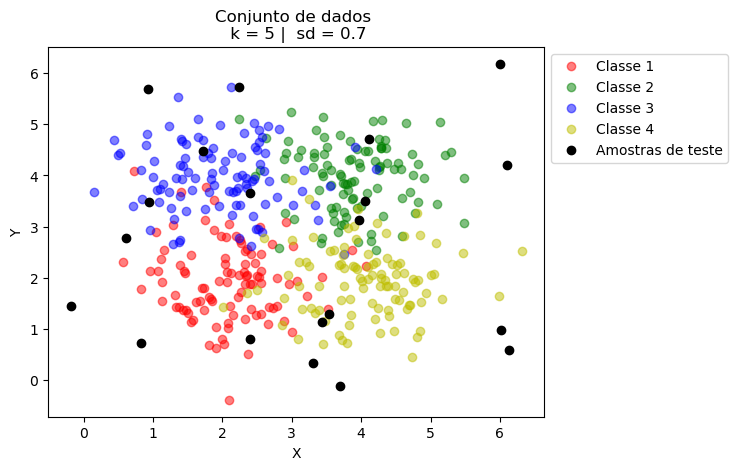

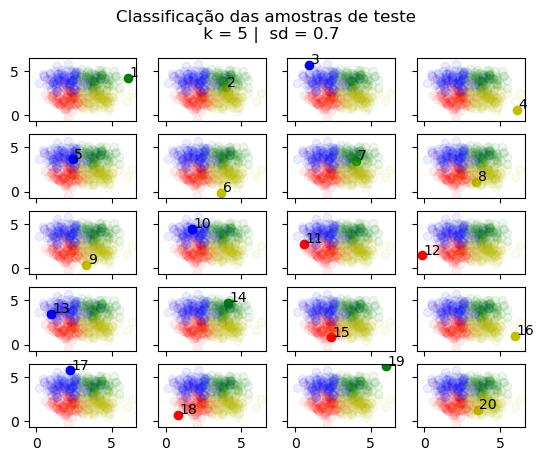

In [7]:
k = 5
sd = 0.7
n = 100
resultado = []

dados, classes = gaussianas(n,0,sd)
amostras_teste = np.random.uniform(dados.min(),dados.max(), size=(20,2))

grafico_dados(dados, amostras_teste, n, k, sd)

for ponto_teste in amostras_teste:
    classificacao = knn(dados, classes, k, ponto_teste)
    resultado.append(classificacao)
                       
grafico_resultado(dados, resultado, n, k, sd)   

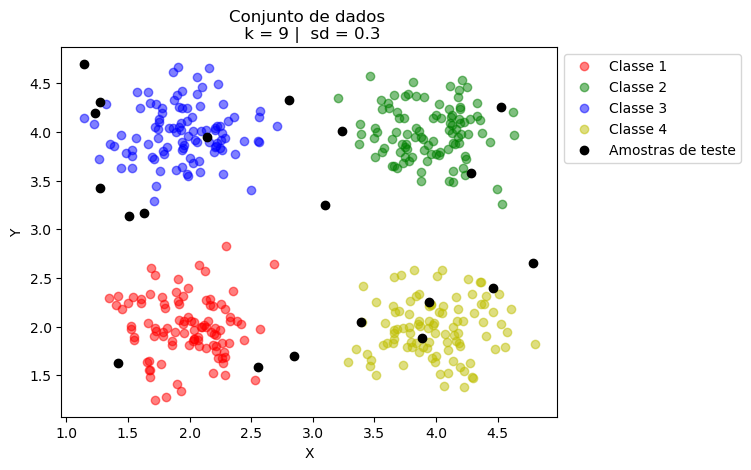

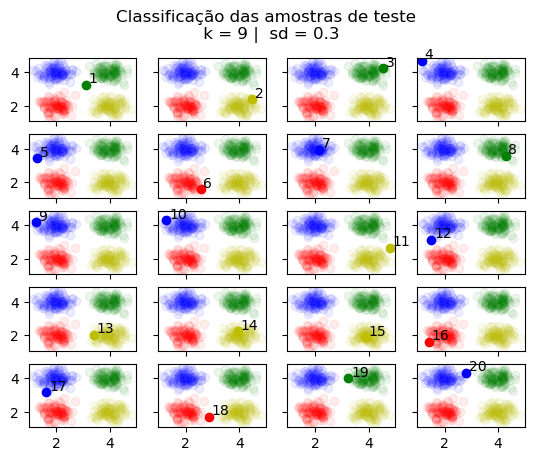

In [8]:
k = 9
sd = 0.3
n = 100
resultado = []

dados, classes = gaussianas(n,0,sd)
amostras_teste = np.random.uniform(dados.min(),dados.max(), size=(20,2))

grafico_dados(dados, amostras_teste, n, k, sd)

for ponto_teste in amostras_teste:
    classificacao = knn(dados, classes, k, ponto_teste)
    resultado.append(classificacao)
                       
grafico_resultado(dados, resultado, n, k, sd)   

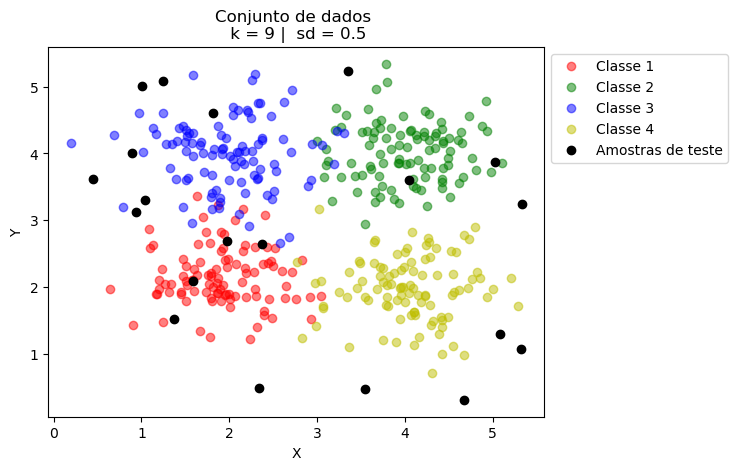

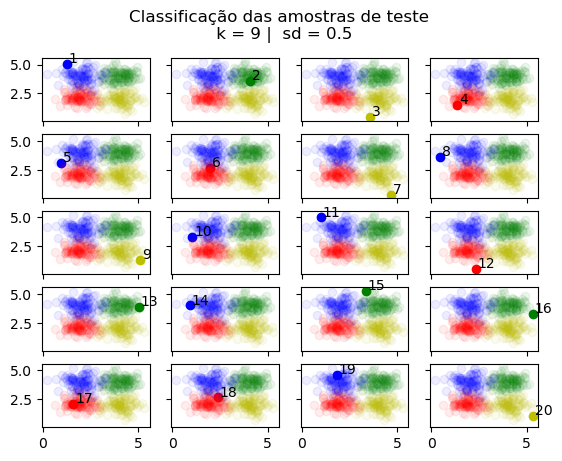

In [9]:
k = 9
sd = 0.5
n = 100
resultado = []

dados, classes = gaussianas(n,0,sd)
amostras_teste = np.random.uniform(dados.min(),dados.max(), size=(20,2))

grafico_dados(dados, amostras_teste, n, k, sd)

for ponto_teste in amostras_teste:
    classificacao = knn(dados, classes, k, ponto_teste)
    resultado.append(classificacao)
                       
grafico_resultado(dados, resultado, n, k, sd)   

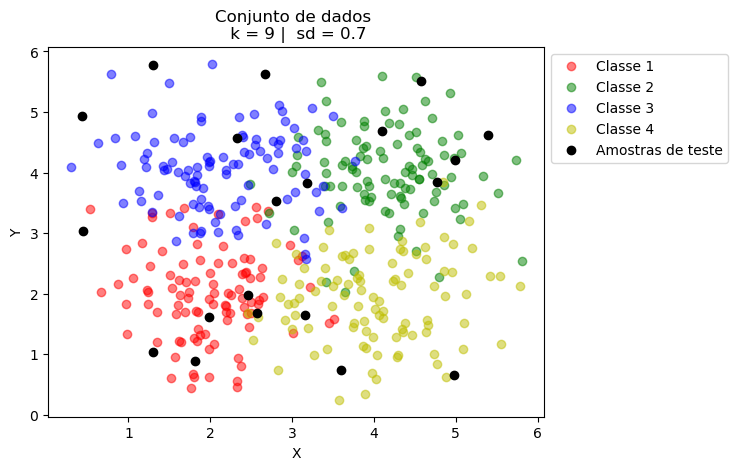

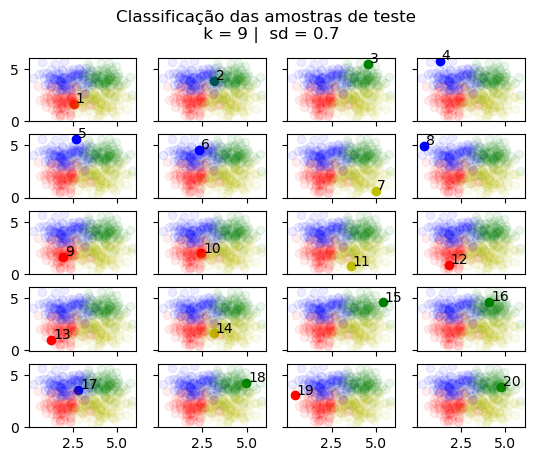

In [10]:
k = 9
sd = 0.7
n = 100
resultado = []

dados, classes = gaussianas(n,0,sd)
amostras_teste = np.random.uniform(dados.min(),dados.max(), size=(20,2))

grafico_dados(dados, amostras_teste, n, k, sd)

for ponto_teste in amostras_teste:
    classificacao = knn(dados, classes, k, ponto_teste)
    resultado.append(classificacao)
                       
grafico_resultado(dados, resultado, n, k, sd)   

### Análise Geral dos Resultados Encontrados

Os diferentes desvios-padrão e parâmetros k utilizados permitem melhorar a precisão e exatidão na classificação do teste. Dessa maneira, com aumento no desvio-padrão obtém-se uma difusão das classes, tornando difícil visualizar a separação entre elas. O parâmetro k possibilita obter mais dados para classificação, mas nem sempre quanto maior o k melhor será o resultado. Para esse experimento como existem 4 classes distintas, o ideal é que k seja maior do que 4, para que não ocorrer a situação em que a amostra de teste esteja equidistante de todas as classes e assim, não ser possível determinar sua classe.
O resultado obtido para as amostras demonstra que o algoritmo construído foi capaz de classificar corretamente todas as amostras.